In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing training dataset using pandas and converting the datagram to matrix

In [43]:
dataset = pd.read_fwf('features_train.txt',sep = " " , header = None)
dataset = dataset.values

### importing testing dataset using pandas and converting the datagram to matrix

In [4]:
testing_data = pd.read_fwf('features_test.txt', sep = " ", header = None)
testing_data = testing_data.values

In [5]:
label1 = 1
label2 = 5

### Training dataset and labels

In [6]:
dataset_5 = dataset[dataset.T[0]==label1]
dataset_0 = dataset[dataset.T[0]==label2]

train_data = np.vstack((dataset_5, dataset_0))
np.random.shuffle(train_data)

train_labels = train_data.T[0]
train_data = train_data.T[1:3].T

### Testing dataset and labels

In [7]:
test_dataset_5 = testing_data[testing_data.T[0]==label1]
test_dataset_0 = testing_data[testing_data.T[0]==label2]

test_data = np.vstack((test_dataset_5, test_dataset_0))
np.random.shuffle(test_data)

test_labels = test_data.T[0]
test_data = test_data.T[1:3].T

## SVM 

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

## DATA DIVISION

In [9]:
div = np.array([50,100,200, 800])



In [10]:
print len(train_labels[0:div[0]])
print len(train_data[0:div[0]])

print len(dataset_5)

50
50
1005


## Training the SVM

### Problem 1: 
### Data taken for training may be skewed towards only one class ( ex: all data belongs to one class) then there is no point in training, so we shuffle the data
### The data has been shuffled once and the SVM classifies a point only between two classes

In [48]:
error = [1e-0, 1e-2, 1e-3, 1e-4] 
deg = [1,2,3,4,5,6,7,8,9,10,11]
scores = np.empty(len(deg))
support_vector = np.empty(len(deg))

## Tolerance = 1.0

In [61]:

for i in range(0, len(deg)):
    clf = SVC(kernel = 'poly', degree = deg[i], C=1.0, random_state = 0, tol = 1e-0)
    clf.fit( train_data , train_labels )
    scores[i] = clf.score(test_data, test_labels)
    support_vector[i] = len(clf.support_vectors_)
    

[0.97641509 0.97877358 0.97877358 0.98113208 0.98349057 0.98584906
 0.98584906 0.98113208 0.98113208 0.98113208 0.97877358]


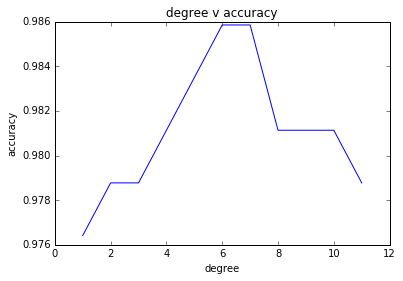

In [62]:
print scores
x = np.linspace(0,3,4)
plt.title("degree v accuracy")
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,scores)



## Tolerance = 0.01

In [63]:
for i in range(0, len(deg)):
    clf = SVC(kernel = 'poly', degree = deg[i], C=1.0, random_state = 0, tol = 1e-2)
    clf.fit( train_data , train_labels )
    scores[i] = clf.score(test_data, test_labels)
    support_vector[i] = len(clf.support_vectors_)
    

[0.97877358 0.98113208 0.98113208 0.98113208 0.98349057 0.98584906
 0.98820755 0.98349057 0.98113208 0.98113208 0.97877358]


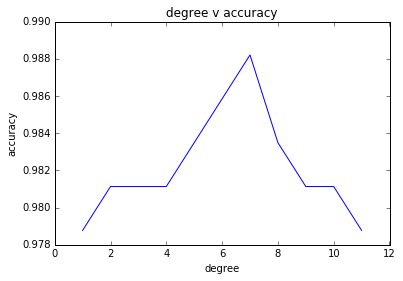

In [64]:
print scores
x = np.linspace(0,3,4)
plt.title("degree v accuracy")
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,scores)

## Tolerance = 0.001

In [65]:
for i in range(0, len(deg)):
    clf = SVC(kernel = 'poly', degree = deg[i], C=1.0, random_state = 0, tol = 1e-3)
    clf.fit( train_data , train_labels )
    scores[i] = clf.score(test_data, test_labels)
    support_vector[i] = len(clf.support_vectors_)

[0.97877358 0.98113208 0.98113208 0.98113208 0.98349057 0.98584906
 0.98820755 0.98349057 0.98113208 0.98113208 0.97877358]


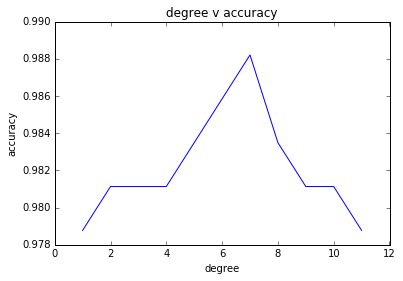

In [66]:
print scores
x = np.linspace(0,3,4)
plt.title("degree v accuracy")
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,scores)

## Tolerance = 0.0001

In [ ]:
for i in range(0, len(deg)):
    clf = SVC(kernel = 'poly', degree = deg[i], C=1.0, gamma = 1, random_state = 0, tol = 1e-4)
    clf.fit( train_data , train_labels )
    scores[i] = clf.score(test_data, test_labels)
    support_vector[i] = len(clf.support_vectors_)

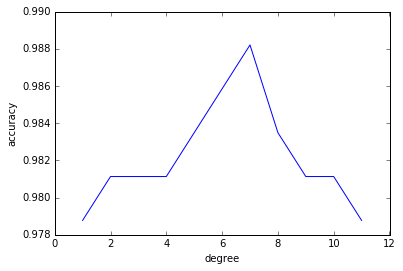

In [58]:
print scores
x = np.linspace(0,3,4)
plt.title("degree v accuracy")
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,scores)

In [19]:
print support_vector

[ 2.  2.  2. 13.]


In [20]:
print clf.support_vectors_

[[ 0.14639062 -1.8294375 ]
 [ 0.22025    -3.0306875 ]
 [ 0.24764258 -2.31925   ]
 [ 0.28905469 -3.669375  ]
 [ 0.13479492 -1.7898125 ]
 [ 0.22255859 -2.02525   ]
 [ 0.10407031 -2.424125  ]
 [ 0.14236523 -2.8335    ]
 [ 0.18000586 -2.755125  ]
 [ 0.30482617 -3.0379375 ]
 [ 0.48453711 -3.700375  ]
 [ 0.16456055 -2.7685625 ]
 [ 0.29119141 -3.1743125 ]]
